# Application of Genetic Algorithms in Routing Optimization

## 1. Importing The Necessary Modules

In [1]:
import numpy as np
import pandas as pd
import random
import copy
import math

## 2. Read the dataset from CSV

In [2]:
citiesDf = pd.read_csv('cities.csv')
citiesDf

,name,description,latitude,longitude
0,Alabama,Montgomery,32.377716,-86.300568
1,Alaska,Juneau,58.301598,-134.420212
2,Arizona,Phoenix,33.448143,-112.096962
3,Arkansas,Little Rock,34.746613,-92.288986
4,California,Sacramento,38.576668,-121.493629
5,Colorado,Denver,39.739227,-104.984856
6,Connecticut,Hartford<br>,41.764046,-72.682198
7,Delaware,Dover,39.157307,-75.519722
8,Hawaii,Honolulu,21.307442,-157.857376
9,Florida,Tallahassee,30.438118,-84.281296


## 3. Data Representation

In [3]:
citiesDf.describe

<bound method NDFrame.describe of               name     description   latitude   longitude
0          Alabama      Montgomery  32.377716  -86.300568
1           Alaska          Juneau  58.301598 -134.420212
2          Arizona         Phoenix  33.448143 -112.096962
3         Arkansas     Little Rock  34.746613  -92.288986
4       California      Sacramento  38.576668 -121.493629
5         Colorado          Denver  39.739227 -104.984856
6      Connecticut    Hartford<br>  41.764046  -72.682198
7         Delaware           Dover  39.157307  -75.519722
8           Hawaii        Honolulu  21.307442 -157.857376
9          Florida     Tallahassee  30.438118  -84.281296
10         Georgia     Atlanta<br>  33.749027  -84.388229
11           Idaho           Boise  43.617775 -116.199722
12        Illinois     Springfield  39.798363  -89.654961
13         Indiana    Indianapolis  39.768623  -86.162643
14            Iowa      Des Moines  41.591087  -93.603729
15          Kansas          Topeka  39

In [4]:
citiesDf.isnull().sum() #exploring the null values

name           0
description    0
latitude       0
longitude      0
dtype: int64

In [5]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>]], dtype=object)

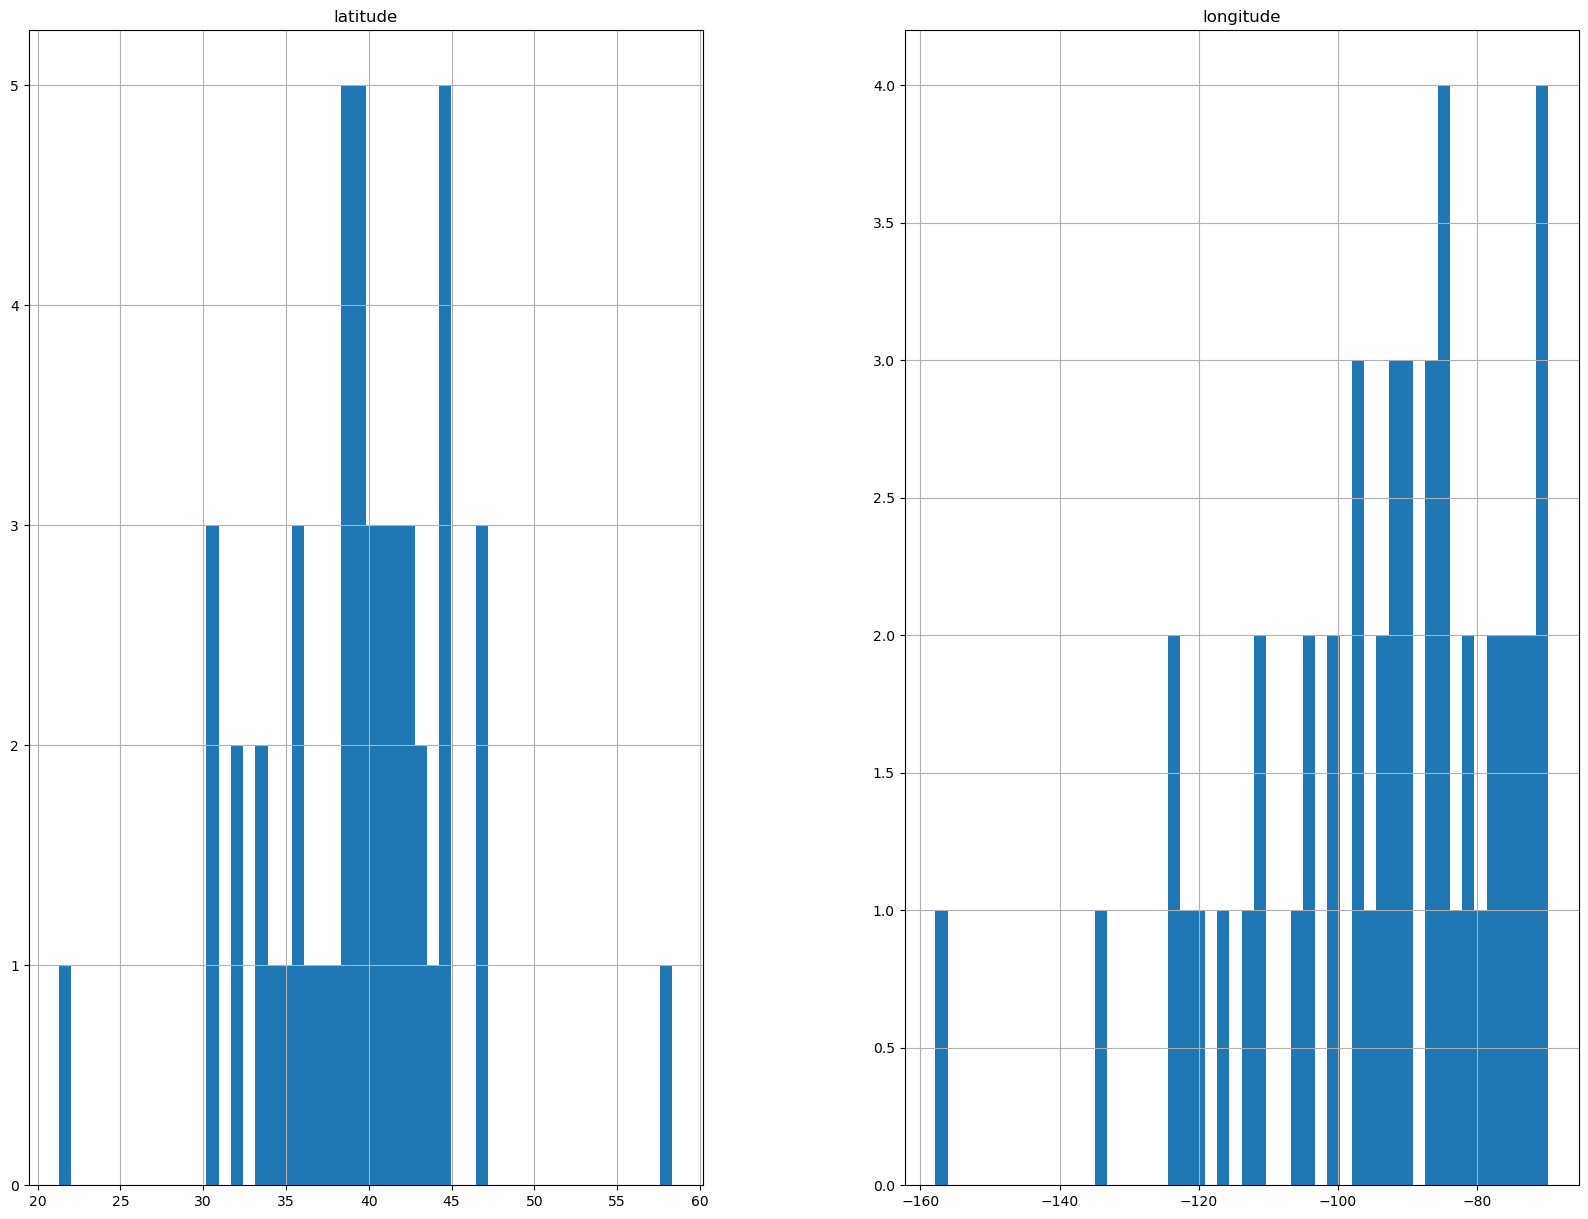

In [6]:
citiesDf.hist(bins=50, figsize = (20,15))

In [7]:
# Extract latitude and longitude values
citiesCoordinates = citiesDf[['latitude', 'longitude']].values

# Define the number of cities
numCities = len(citiesCoordinates)

# Calculate distance between two cities
def distance(city1, city2):
    return np.linalg.norm(city1 - city2)

# Calculate total distance of a route
def totalDistance(route):
    total = 0
    for i in range(numCities - 1):
        total += distance(route[i], route[i+1])
    total += distance(route[-1], route[0])  # Return to the starting city
    return total

## 4. ALgorithm Building
### i. Genetic Algorithm

In [8]:
# Initialize population
def initializePopulationGa(populationSize, numCities):
    population = []
    for _ in range(populationSize):
        route = list(range(numCities))
        random.shuffle(route)
        population.append(route)
    return population

# Select parents for crossover using tournament selection
def selectParentsGa(population, tournamentSize=3):
    tournament = random.sample(population, tournamentSize)
    return min(tournament, key=totalDistance)

# Perform crossover to create offspring
def crossoverGa(parent1, parent2):
    crossoverPoint = random.randint(0, len(parent1) - 1)
    offspring1 = parent1[:crossoverPoint] + [gene for gene in parent2 if gene not in parent1[:crossoverPoint]]
    offspring2 = parent2[:crossoverPoint] + [gene for gene in parent1 if gene not in parent2[:crossoverPoint]]
    return offspring1, offspring2

# Perform mutation by swapping two cities
def mutateGa(route, mutationRate):
    if random.random() < mutationRate:
        idx1, idx2 = random.sample(range(len(route)), 2)
        route[idx1], route[idx2] = route[idx2], route[idx1]
    return route

# Genetic Algorithm
def geneticAlgorithm(numGenerations, populationSize, numCities, mutationRate):
    population = initializePopulationGa(populationSize, numCities)
    for _ in range(numGenerations):
        newPopulation = []
        for _ in range(populationSize // 2):
            parent1 = selectParentsGa(population)
            parent2 = selectParentsGa(population)
            offspring1, offspring2 = crossoverGa(parent1, parent2)
            offspring1 = mutateGa(offspring1, mutationRate)
            offspring2 = mutateGa(offspring2, mutationRate)
            newPopulation.extend([offspring1, offspring2])
        population = newPopulation
    bestRoute = min(population, key=totalDistance)
    return bestRoute

### ii. Simulated Annealing

In [9]:
def simulatedAnnealing(numIterations, initialTemperature):
    currentRoute = list(range(numCities))
    currentDistance = totalDistance([citiesCoordinates[i] for i in currentRoute])
    bestRoute = currentRoute
    bestDistance = currentDistance
    temperature = initialTemperature
    for _ in range(numIterations):
        newRoute = currentRoute[:]
        idx1, idx2 = random.sample(range(numCities), 2)
        newRoute[idx1], newRoute[idx2] = newRoute[idx2], newRoute[idx1]
        newDistance = totalDistance([citiesCoordinates[i] for i in newRoute])
        if newDistance < currentDistance or random.random() < math.exp((currentDistance - newDistance) / temperature):
            currentRoute = newRoute
            currentDistance = newDistance
            if currentDistance < bestDistance:
                bestRoute = currentRoute
                bestDistance = currentDistance
        temperature *= 0.99
    return bestRoute

### iii. Ant Colony Optimization (ACO)

In [10]:
class AntColony:
    def __init__(self, numAnts, numIterations, evaporationRate, alpha, beta):
        self.numAnts = numAnts
        self.numIterations = numIterations
        self.evaporationRate = evaporationRate
        self.alpha = alpha
        self.beta = beta

    def run(self):
        pheromones = np.ones((numCities, numCities))
        bestRoute = []
        bestDistance = float('inf')
        for _ in range(self.numIterations):
            routes = self.constructRoutes(pheromones)
            self.updatePheromones(pheromones, routes)
            currentBestRoute = min(routes, key=totalDistance)
            currentBestDistance = totalDistance([citiesCoordinates[i] for i in currentBestRoute])
            if currentBestDistance < bestDistance:
                bestRoute = currentBestRoute
                bestDistance = currentBestDistance
        return bestRoute

    def constructRoutes(self, pheromones):
        routes = []
        for _ in range(self.numAnts):
            visited = [False] * numCities
            currentCity = random.randint(0, numCities - 1)
            visited[currentCity] = True
            route = [currentCity]
            for _ in range(numCities - 1):
                nextCity = self.selectNextCity(currentCity, visited, pheromones)
                visited[nextCity] = True
                route.append(nextCity)
                currentCity = nextCity
            routes.append(route)
        return routes

    def selectNextCity(self, currentCity, visited, pheromones):
        unvisitedProbabilities = [math.pow(pheromones[currentCity][i], self.alpha) * math.pow(1 / distance(citiesCoordinates[currentCity], citiesCoordinates[i]), self.beta) if not visited[i] else 0 for i in range(numCities)]
        totalProbability = sum(unvisitedProbabilities)
        probabilities = [prob / totalProbability for prob in unvisitedProbabilities]
        nextCity = np.random.choice(range(numCities), p=probabilities)
        return nextCity

    def updatePheromones(self, pheromones, routes):
        for i in range(numCities):
            for j in range(numCities):
                pheromones[i][j] *= (1 - self.evaporationRate)
        for route in routes:
            distanceDelta = 1 / totalDistance([citiesCoordinates[route[i]] for i in range(numCities)])
            for i in range(numCities - 1):
                pheromones[route[i]][route[i+1]] += distanceDelta
            pheromones[route[-1]][route[0]] += distanceDelta

### iv. Particle Swarm Optimization (PSO)

In [11]:
class Particle:
    def __init__(self):
        self.position = np.random.permutation(range(numCities))
        self.velocity = np.random.permutation(range(numCities))
        self.bestPosition = self.position.copy()
        self.bestFitness = totalDistance([citiesCoordinates[i] for i in self.position])

    def updateVelocity(self, globalBestPosition, inertiaWeight, cognitiveWeight, socialWeight):
        inertiaTerm = inertiaWeight * self.velocity
        cognitiveTerm = cognitiveWeight * np.random.rand() * (self.bestPosition - self.position)
        socialTerm = socialWeight * np.random.rand() * (globalBestPosition - self.position)
        self.velocity = inertiaTerm + cognitiveTerm + socialTerm

    def updatePosition(self):
        roundedVelocity = np.round(self.velocity).astype(int)
        self.position = np.roll(self.position, roundedVelocity)

def particleSwarmOptimization(numParticles, numIterations, inertiaWeight, cognitiveWeight, socialWeight):
    particles = [Particle() for _ in range(numParticles)]
    globalBestPosition = min(particles, key=lambda x: x.bestFitness).bestPosition
    for _ in range(numIterations):
        for particle in particles:
            particle.updateVelocity(globalBestPosition, inertiaWeight, cognitiveWeight, socialWeight)
            particle.updatePosition()
            particleDistance = totalDistance([citiesCoordinates[i] for i in particle.position])
            if particleDistance < particle.bestFitness:
                particle.bestPosition = particle.position.copy()
                particle.bestFitness = particleDistance
                if particleDistance < totalDistance([citiesCoordinates[i] for i in globalBestPosition]):
                    globalBestPosition = particle.position.copy()
    return globalBestPosition

In [19]:
def plot_route(route, cities, color, label=''):
    route_cities = [cities[i] for i in route]
    route_cities.append(route_cities[0])  # Closing the loop
    x = [city[0] for city in route_cities]
    y = [city[1] for city in route_cities]
    plt.plot(x, y, 'o-', color=color, label=label)

## 5. Main Function

Best Route (Genetic Algorithm): [21, 20, 16, 15, 14, 11, 9, 7, 5, 4, 1, 0, 2, 3, 6, 8, 10, 23, 24, 25, 26, 27, 28, 29, 30, 36, 37, 38, 35, 33, 32, 31, 34, 39, 41, 42, 43, 49, 48, 47, 46, 45, 44, 40, 17, 13, 12, 18, 19, 22]
Total Distance (Genetic Algorithm): 1088.6122557732804
Best Route (Simulated Annealing): [3, 17, 42, 15, 5, 23, 30, 25, 46, 36, 8, 1, 43, 32, 49, 22, 48, 45, 34, 21, 12, 16, 13, 41, 24, 40, 14, 7, 37, 6, 20, 38, 29, 10, 9, 2, 4, 27, 11, 35, 26, 33, 28, 18, 44, 19, 31, 47, 39, 0]
Total Distance (Simulated Annealing): 478.5451504616784
Best Route (Ant Colony Optimization): [15, 26, 14, 22, 48, 12, 24, 3, 23, 17, 0, 9, 10, 39, 31, 45, 19, 7, 29, 37, 33, 6, 38, 20, 28, 44, 18, 16, 13, 21, 34, 47, 41, 35, 42, 30, 5, 49, 40, 32, 43, 11, 27, 4, 36, 46, 1, 8, 2, 25]
Total Distance (Ant Colony Optimization): 310.85499661443765
Best Route (Particle Swarm Optimization): [42 11 17  3  0 14 22  9 44  2 32 12 41  1 46 28 18 47 48 45 29 33 25 23
 10 34 13 40 38 39  6 19 24 49 30  4

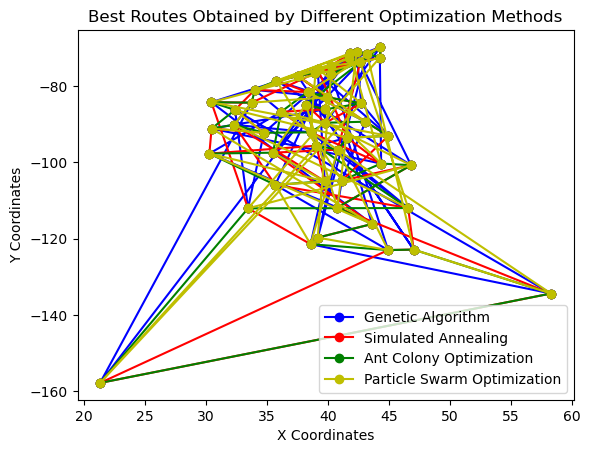

In [20]:
def main():
    numGenerations = 1000
    populationSize = 100
    mutationRate = 0.1
    
    # Genetic Algorithm
    bestRouteGa = geneticAlgorithm(numGenerations, populationSize, numCities, mutationRate)
    print("Best Route (Genetic Algorithm):", bestRouteGa)
    print("Total Distance (Genetic Algorithm):", totalDistance([citiesCoordinates[i] for i in bestRouteGa]))
    plot_route(bestRouteGa, citiesCoordinates, color='b', label='Genetic Algorithm')

    # Simulated Annealing
    bestRouteSa = simulatedAnnealing(1000, 1000)
    print("Best Route (Simulated Annealing):", bestRouteSa)
    print("Total Distance (Simulated Annealing):", totalDistance([citiesCoordinates[i] for i in bestRouteSa]))
    plot_route(bestRouteSa, citiesCoordinates, color='r', label='Simulated Annealing')

    # Ant Colony Optimization (ACO)
    antColony = AntColony(numAnts=50, numIterations=100, evaporationRate=0.5, alpha=1, beta=2)
    bestRouteAco = antColony.run()
    print("Best Route (Ant Colony Optimization):", bestRouteAco)
    print("Total Distance (Ant Colony Optimization):", totalDistance([citiesCoordinates[i] for i in bestRouteAco]))
    plot_route(bestRouteAco, citiesCoordinates, color='g', label='Ant Colony Optimization')

    # Particle Swarm Optimization (PSO)
    bestRoutePso = particleSwarmOptimization(numParticles=50, numIterations=100, inertiaWeight=0.5, cognitiveWeight=1, socialWeight=1)
    print("Best Route (Particle Swarm Optimization):", bestRoutePso)
    print("Total Distance (Particle Swarm Optimization):", totalDistance([citiesCoordinates[i] for i in bestRoutePso]))
    plot_route(bestRoutePso, citiesCoordinates, color='y', label='Particle Swarm Optimization')

    plt.xlabel('X Coordinates')
    plt.ylabel('Y Coordinates')
    plt.title('Best Routes Obtained by Different Optimization Methods')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()